# INVESTIGATE TMDB DATASET
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
#importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## column name and significance
1. **movie_id** - Shows a unique identifier for each movie.<br>
2. **cast** - Shows the name of lead and supporting actors.<br>
3. **budget** - Shows the budget in which the movie was made.<br>
4. **homepage** - Shows a link to the homepage of the movie.<br>
5. **id** - Shows the id  for each movie.<br>
6. **keywords** - Shows the keywords or tags related to the movie.<br>
7. **original_title** - Shows the title of the movie before translation or adaptation.<br>
8. **overview** - Shows a brief description of the movie.<br>
9. **popularity** - Shows a numeric quantity specifying the movie popularity.<br>
10. **production_companies** - Shows the production house of the movie.<br>
11. **release_date** - Shows the date on which it was released.<br>
12. **revenue** - Shows the worldwide revenue generated by the movie.<br>
13. **runtime** - Shows the running time of the movie in minutes.<br>
14. **tagline** - Movie's tagline.<br>
15. **title** - Shows the title of the movie.<br>
16. **vote_average** - Shows the average ratings the movie recieved.<br>
17. **vote_count** - Shows the count of votes recieved.<br>
18. **director** - Shows the name of the person who determines the creative vision of a movie.<br>
19. **budget_adj** - Shows the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
20. **revenue_adj** - Shows the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.<br>
21. **release_year** - Shows the year on which the movie was released.<br>


<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Data Wrangling Methods
- Identify the missing values or NaNs in the dataset and removing them
- Identify rows with zeros and filling the rows with the mean of the columns 
- Identifying duplicated rows and dropping them
- Drop-column-method: dropping columns with unwanted information


In [3]:
#dropping irrelevant data
df.drop(['budget_adj', 'id', 'imdb_id', 'revenue_adj', 'release_date', 'keywords', 'tagline', 'overview', 'homepage'], axis = 1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


In [4]:
#making the movie title the index
df.set_index('original_title', inplace=True)
df.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
original_title,,,,,,,,,,,
Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
Furious 7,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.7+ KB


In [6]:
#checking for empty rows
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [7]:
#removing empty rows from the dataframe
df.dropna(inplace = True)
df

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
original_title,,,,,,,,,,,
Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
Furious 7,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
The Endless Summer,0.080598,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966
Grand Prix,0.065543,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966
Beregis Avtomobilya,0.065141,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966


In [8]:
#checking for rows with zero as values
(df == 0).sum()

popularity                 0
budget                  4751
revenue                 5022
cast                       0
director                   0
runtime                   13
genres                     0
production_companies       0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [9]:
#filling rows with zeros as values with the mean of the columns
mean = df[['budget', 'revenue', 'runtime']].mean()
df[['budget', 'revenue', 'runtime']] = df[['budget', 'revenue', 'runtime']].replace(0, mean)
(df == 0).sum()


popularity              0
budget                  0
revenue                 0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [10]:
#checking for duplicated rows
df.duplicated().sum()

1

In [11]:
#removing duplicated rows
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [12]:
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,2.404667e+07,6.696012e+07,103.063552,239.312014,5.963528,2000.878428
std,1.036931,2.912642e+07,1.162147e+08,27.623136,603.011504,0.913174,13.036794
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,0.232710,1.618108e+07,3.526309e+07,91.000000,18.000000,5.400000,1994.000000
50%,0.419762,1.618108e+07,4.422678e+07,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,4.422678e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
#replacing the pipe character in genres with comma
df['genres'] = df['genres'].str.replace('|', ', ', regex = True)
df.head(1)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
original_title,,,,,,,,,,,
Jurassic World,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,"Action, Adventure, Science Fiction, Thriller",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


### Analysing the dataframe

In [16]:
def bar_plt_(x, xlabel, title):
    '''A function to dra a bar chart'''
    ax = plt.subplot(1, 1, 1)
    ax.hist(x)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show() 

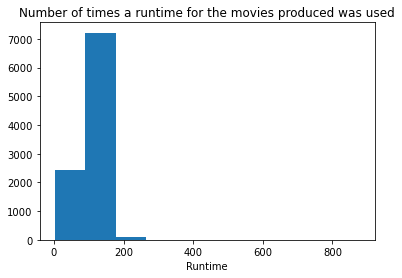

In [17]:
bar_plt_(df.runtime, 'Runtime', 'Number of times a runtime for the movies produced was used')

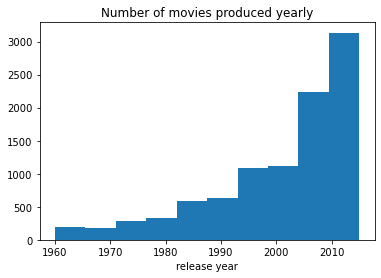

In [18]:
bar_plt_(df.release_year, 'release year', 'Number of movies produced yearly')

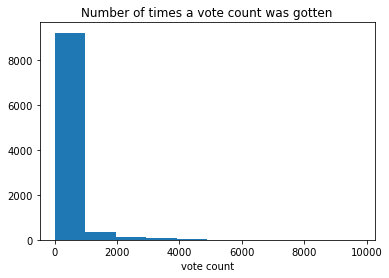

In [19]:
bar_plt_(df.vote_count, 'vote count', 'Number of times a vote count was gotten')

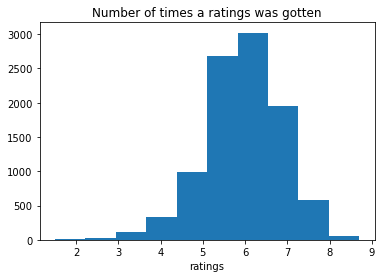

In [20]:
bar_plt_(df.vote_average, 'ratings', 'Number of times a ratings was gotten')

From the histograms it can be seen that;
1. The most of the runtime of a movie was around 200 minutes.
2. More movies while released in the latest year.
3. The ratings for a movie were mostly 6.

## Question 1: What hat kinds of properties are associated with movies that have high revenues?

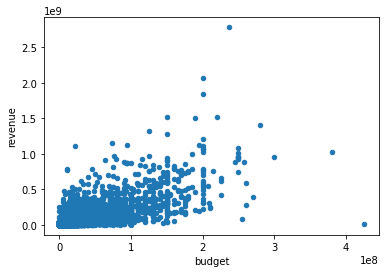

In [21]:
df.plot.scatter(x = 'budget', y = 'revenue')
plt.show()

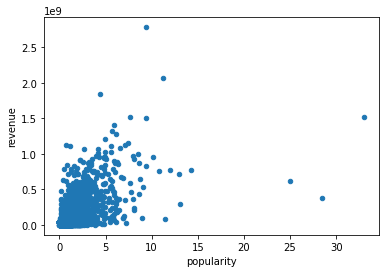

In [22]:
df.plot.scatter(x = 'popularity', y = 'revenue')
plt.show()

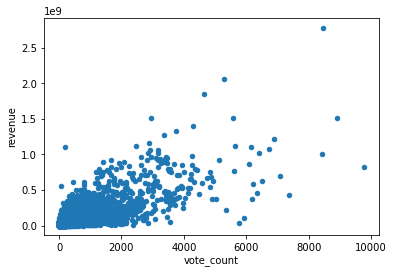

In [23]:
df.plot.scatter(x = 'vote_count', y = 'revenue')
plt.show()

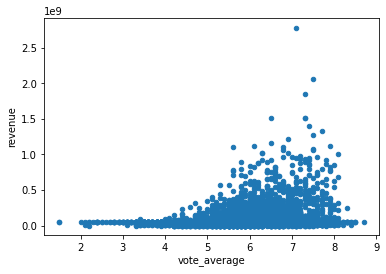

In [24]:
df.plot.scatter(x = 'vote_average', y = 'revenue')
plt.show()

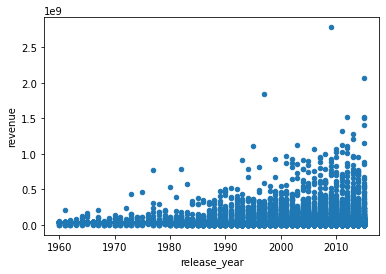

In [25]:
df.plot.scatter(x = 'release_year', y = 'revenue')
plt.show()

From the scatter plots we can see that:
1. Budget a has positive correlation with revenue.
2. Popularity a positive correlation with revenue.
3. There is a positive correlation between movies with active viewers and revenue.
4. There is apositive correlation between vote average and revenue.
5. There is a positive correlation between the number of released movies per year and their revenue.

## Question 2: What production company produced the most movie?

In [26]:
#checking the number of production companies
df['production_companies'].nunique()

7406

In [27]:
#checking for the number of movies each production company produced
tab = df['production_companies'].value_counts()
tab

Paramount Pictures                       156
Universal Pictures                       133
Warner Bros.                              84
Walt Disney Pictures                      75
Columbia Pictures                         72
                                        ... 
Walt Disney Pictures|Disney Channel        1
Silverwood Films                           1
Lunch Box Entertainment                    1
Atitude ProduÃ§Ãµes e Empreendimentos      1
Norm-Iris                                  1
Name: production_companies, Length: 7406, dtype: int64

In [28]:
# converting the value counts to dictionary and then list
table = dict(tab)
table_items = table.items()
table_list = list(table_items)

In [29]:
#converting the list to a dataframe
df1 = pd.DataFrame(table_list)
df1

,0,1
0,Paramount Pictures,156
1,Universal Pictures,133
2,Warner Bros.,84
3,Walt Disney Pictures,75
4,Columbia Pictures,72
...,...,...
7401,Walt Disney Pictures|Disney Channel,1
7402,Silverwood Films,1
7403,Lunch Box Entertainment,1
7404,Atitude ProduÃ§Ãµes e Empreendimentos,1


In [30]:
# changing the columns name in the new dataframe
df1.rename(columns = {0: 'production_company', 1: 'movies_produced'}, inplace = True)
df1

,production_company,movies_produced
0,Paramount Pictures,156
1,Universal Pictures,133
2,Warner Bros.,84
3,Walt Disney Pictures,75
4,Columbia Pictures,72
...,...,...
7401,Walt Disney Pictures|Disney Channel,1
7402,Silverwood Films,1
7403,Lunch Box Entertainment,1
7404,Atitude ProduÃ§Ãµes e Empreendimentos,1


In [31]:
#getting the top 15 companies that produced the most movie
top_15 = df1.iloc[:15, :]
top_15


,production_company,movies_produced
0,Paramount Pictures,156
1,Universal Pictures,133
2,Warner Bros.,84
3,Walt Disney Pictures,75
4,Columbia Pictures,72
5,Metro-Goldwyn-Mayer (MGM),72
6,New Line Cinema,61
7,Touchstone Pictures,51
8,20th Century Fox,50
9,Twentieth Century Fox Film Corporation,49


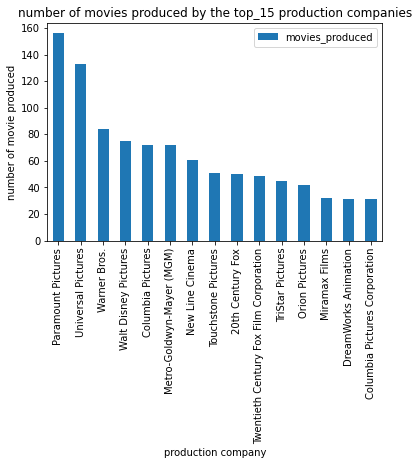

In [32]:
#plotting a bar chart to show the number of movies produced by the top 15 production companies
top_15.plot.bar(x = 'production_company', y = 'movies_produced')
plt.xlabel('production company')
plt.ylabel('number of movie produced')
plt.title('number of movies produced by the top_15 production companies')
plt.show()

From the bar chart above it can be seen that paramount pictures produced the most movies.

## Question 3: What movie gave the highest profit

In [33]:
#getting the profit of each movie produced
profit = df['revenue'] - df['budget']
profit

original_title
Jurassic World                  1.363529e+09
Mad Max: Fury Road              2.284364e+08
Insurgent                       1.852382e+08
Star Wars: The Force Awakens    1.868178e+09
Furious 7                       1.316249e+09
                                    ...     
The Endless Summer              2.804570e+07
Grand Prix                      2.804570e+07
Beregis Avtomobilya             2.804570e+07
What's Up, Tiger Lily?          2.804570e+07
Manos: The Hands of Fate        4.420778e+07
Length: 9772, dtype: float64

In [34]:
#creating a new column in the dataframe for profit
df['profit'] = profit
df.head(1)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
original_title,,,,,,,,,,,,
Jurassic World,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,"Action, Adventure, Science Fiction, Thriller",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.363529e+09


In [35]:
df['profit'].max()

2544505847.0

In [36]:
# getting the top 15 movies with the highest profit 
df2 = df.sort_values(by=['profit'], ascending = False).head(15)
df2

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
original_title,,,,,,,,,,,,
Avatar,9.432768,237000000.0,2.781506e+09,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,"Action, Adventure, Fantasy, Science Fiction",Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.544506e+09
Star Wars: The Force Awakens,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,"Action, Adventure, Science Fiction, Fantasy",Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.868178e+09
Titanic,4.355219,200000000.0,1.845034e+09,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,"Drama, Romance, Thriller",Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,1.645034e+09
Jurassic World,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,"Action, Adventure, Science Fiction, Thriller",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.363529e+09
Furious 7,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,"Action, Crime, Thriller",Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.316249e+09
The Avengers,7.637767,220000000.0,1.519558e+09,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,"Science Fiction, Action, Adventure",Marvel Studios,8903,7.3,2012,1.299558e+09
Harry Potter and the Deathly Hallows: Part 2,5.711315,125000000.0,1.327818e+09,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130.0,"Adventure, Family, Fantasy",Warner Bros.|Heyday Films|Moving Picture Compa...,3750,7.7,2011,1.202818e+09
Avengers: Age of Ultron,5.944927,280000000.0,1.405036e+09,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,"Action, Adventure, Science Fiction",Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015,1.125036e+09
Frozen,6.112766,150000000.0,1.274219e+09,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102.0,"Animation, Adventure, Family",Walt Disney Pictures|Walt Disney Animation Stu...,3369,7.5,2013,1.124219e+09


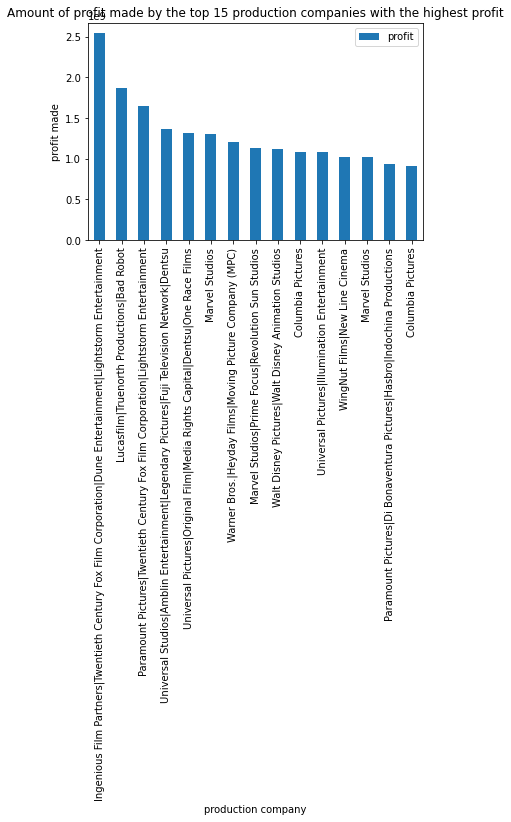

In [37]:
#plotting  abar chart to see the top 15 production companies with the highest profit
df2.plot.bar(x = 'production_companies', y = 'profit')
plt.xlabel('production company')
plt.ylabel('profit made')
plt.title('Amount of profit made by the top 15 production companies with the highest profit')
plt.show()

From the analysis above it can be seen that the movie, Avatar produced by the company, Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment made the most profit.

## Question 4: The companies with the highest profit produced how many movies?

In [38]:
#getting the unique values of production company
company = df2['production_companies'].unique()
company

array(['Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment',
       'Lucasfilm|Truenorth Productions|Bad Robot',
       'Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment',
       'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films',
       'Marvel Studios',
       'Warner Bros.|Heyday Films|Moving Picture Company (MPC)',
       'Marvel Studios|Prime Focus|Revolution Sun Studios',
       'Walt Disney Pictures|Walt Disney Animation Studios',
       'Columbia Pictures',
       'Universal Pictures|Illumination Entertainment',
       'WingNut Films|New Line Cinema',
       'Paramount Pictures|Di Bonaventura Pictures|Hasbro|Indochina Productions'],
      dtype=object)

In [39]:
#converting the unique values of production company to a list
company_list = company.tolist()
company_list

['Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment',
 'Lucasfilm|Truenorth Productions|Bad Robot',
 'Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment',
 'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
 'Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films',
 'Marvel Studios',
 'Warner Bros.|Heyday Films|Moving Picture Company (MPC)',
 'Marvel Studios|Prime Focus|Revolution Sun Studios',
 'Walt Disney Pictures|Walt Disney Animation Studios',
 'Columbia Pictures',
 'Universal Pictures|Illumination Entertainment',
 'WingNut Films|New Line Cinema',
 'Paramount Pictures|Di Bonaventura Pictures|Hasbro|Indochina Productions']

In [40]:
#checking the number of movies made in the company list created with the datframe
df4 = df1.loc[df1['production_company'].isin(company_list)]
df4

,production_company,movies_produced
4,Columbia Pictures,72
19,Marvel Studios,22
33,Walt Disney Pictures|Walt Disney Animation Stu...,12
43,Universal Pictures|Illumination Entertainment,8
1237,Universal Studios|Amblin Entertainment|Legenda...,1
1526,Paramount Pictures|Twentieth Century Fox Film ...,1
4332,Ingenious Film Partners|Twentieth Century Fox ...,1
5073,Marvel Studios|Prime Focus|Revolution Sun Studios,1
5080,Universal Pictures|Original Film|Media Rights ...,1
5081,Lucasfilm|Truenorth Productions|Bad Robot,1


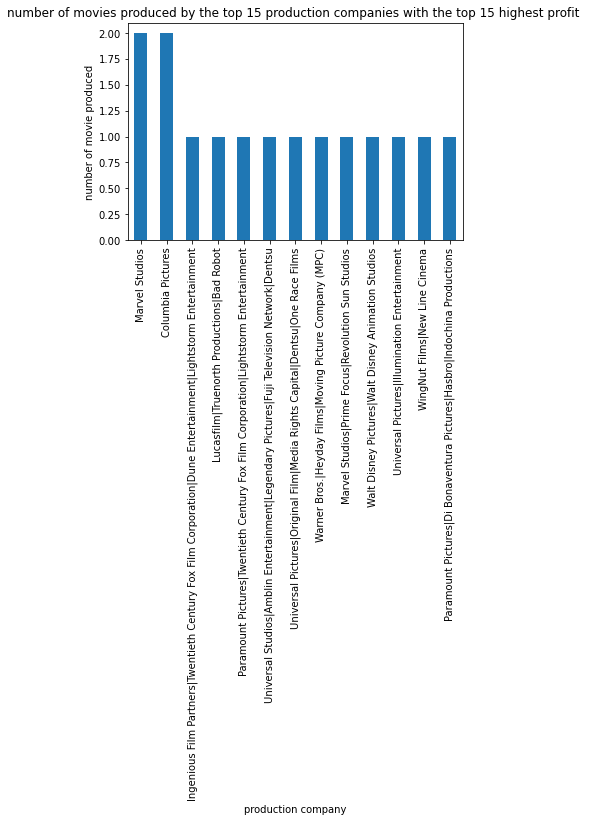

In [41]:
#plotting a bar chart to get the number of movies produced by a production company that made the top 15 highest profit 
df2['production_companies'].value_counts().plot(kind = 'bar')
plt.xlabel('production company')
plt.ylabel('number of movie produced')
plt.title('number of movies produced by the top 15 production companies with the top 15 highest profit ')
plt.show()

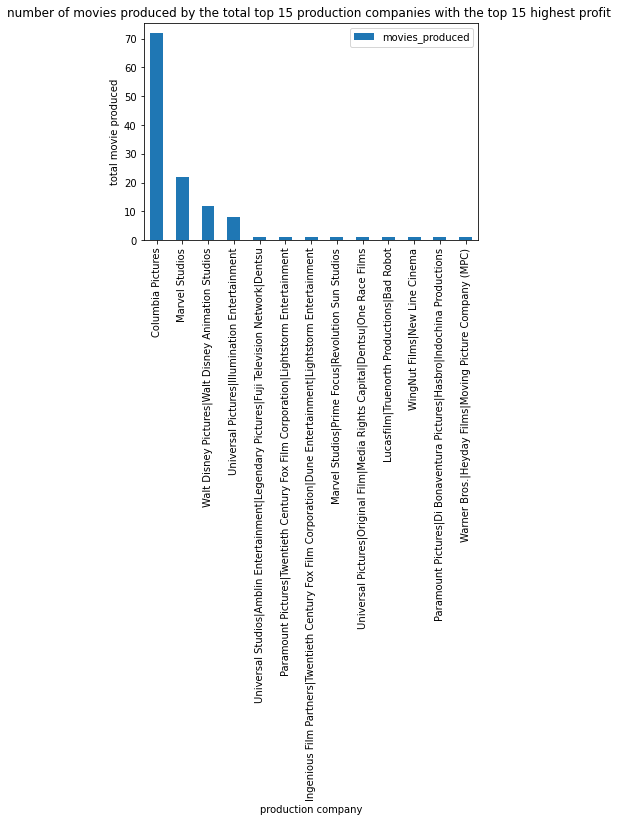

In [42]:
#plotting a bar chart to show the total number of movies produced by a production company that has produced a moive with top 15 highest profit
df4.plot.bar(x = 'production_company', y = 'movies_produced')
plt.xlabel('production company')
plt.ylabel('total movie produced')
plt.title('number of movies produced by the total top 15 production companies with the top 15 highest profit ')
plt.show()

From the analysis above it can be seen that Columbia Pictures produced the most movies amongs the top 15 movies that gave the highest profit, while Columbia Picture and Marvel Studios produced the number of movies with the most profit.

## Question 5: Companies that produced movies with high ratings?

In [43]:
#arranging the dataframe in vote average descending order to get the top 15 movies with the highest ratings
df5 = df.sort_values(by=['vote_average'], ascending = False).head(15)
df5

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
original_title,,,,,,,,,,,,
Pink Floyd: Pulse,0.212010,1.618108e+07,4.422678e+07,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145.0,Music,SMV Enterprises|Columbia Music Video|EMI,23,8.7,2006,2.804570e+07
Queen - Rock Montreal,0.302908,1.618108e+07,4.422678e+07,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,138.0,Music,Edel records GmbH,14,8.5,1981,2.804570e+07
A Personal Journey with Martin Scorsese Through American Movies,0.194889,1.618108e+07,4.422678e+07,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225.0,Documentary,Miramax Films|British Film Institute (BFI),11,8.5,1995,2.804570e+07
The Art of Flight,0.321341,1.618108e+07,4.422678e+07,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80.0,"Adventure, Documentary",Red Bull Media House|Brain Farm Digital Cinema,60,8.5,2011,2.804570e+07
"Guten Tag, RamÃ³n",0.054380,4.000000e+06,4.422678e+07,Adriana Barraza|RÃ¼diger Evers|Hector Kotsifak...,Jorge RamÃ­rez SuÃ¡rez,119.0,Drama,Eficine 226|Beanca Films|Fondo de InversiÃ³n y...,11,8.4,2013,4.022678e+07
The Jinx: The Life and Deaths of Robert Durst,0.033378,1.618108e+07,4.422678e+07,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240.0,Documentary,Blumhouse Productions|Hit the Ground Running F...,72,8.4,2015,2.804570e+07
Stop Making Sense,0.283191,1.200000e+06,4.978922e+06,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88.0,"Documentary, Music",Talking Heads|Arnold Stiefel Company,23,8.4,1984,3.778922e+06
The Shawshank Redemption,7.192039,2.500000e+07,2.834147e+07,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,"Drama, Crime",Castle Rock Entertainment,5754,8.4,1994,3.341469e+06
The Century of the Self,0.090605,1.618108e+07,4.422678e+07,Martin Bergmann|Ann Bernays|Edward Bernays|Ann...,Adam Curtis,235.0,Documentary,British Broadcasting Corporation (BBC)|RDF Media,14,8.3,2002,2.804570e+07


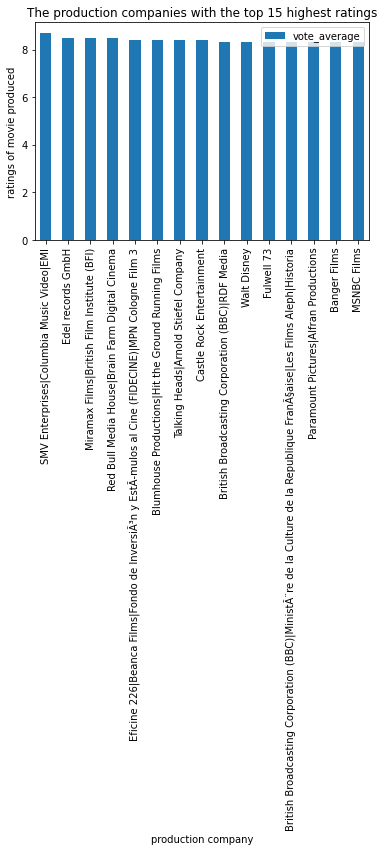

In [44]:
#plotting a bar chart to show the top 15 production companies with the high ratings 
df5.plot.bar(x = 'production_companies', y = 'vote_average')
plt.xlabel('production company')
plt.ylabel('ratings of movie produced')
plt.title('The production companies with the top 15 highest ratings')
plt.show()

In [45]:
#getting the names of companies that had the top 15 highest ratings
company_ratings = df5['production_companies'].unique()
company_ratings

array(['SMV Enterprises|Columbia Music Video|EMI', 'Edel records GmbH',
       'Miramax Films|British Film Institute (BFI)',
       'Red Bull Media House|Brain Farm Digital Cinema',
       'Eficine 226|Beanca Films|Fondo de InversiÃ³n y EstÃ\xadmulos al Cine (FIDECINE)|MPN Cologne Film 3',
       'Blumhouse Productions|Hit the Ground Running Films',
       'Talking Heads|Arnold Stiefel Company',
       'Castle Rock Entertainment',
       'British Broadcasting Corporation (BBC)|RDF Media', 'Walt Disney',
       'Fulwell 73',
       'British Broadcasting Corporation (BBC)|MinistÃ¨re de la Culture de la Republique FranÃ§aise|Les Films Aleph|Historia',
       'Paramount Pictures|Alfran Productions', 'Banger Films',
       'MSNBC Films'], dtype=object)

In [46]:
#converting the top 15 companies with the highest ratings to a list
company_ratings_list = company_ratings.tolist()
company_ratings_list

['SMV Enterprises|Columbia Music Video|EMI',
 'Edel records GmbH',
 'Miramax Films|British Film Institute (BFI)',
 'Red Bull Media House|Brain Farm Digital Cinema',
 'Eficine 226|Beanca Films|Fondo de InversiÃ³n y EstÃ\xadmulos al Cine (FIDECINE)|MPN Cologne Film 3',
 'Blumhouse Productions|Hit the Ground Running Films',
 'Talking Heads|Arnold Stiefel Company',
 'Castle Rock Entertainment',
 'British Broadcasting Corporation (BBC)|RDF Media',
 'Walt Disney',
 'Fulwell 73',
 'British Broadcasting Corporation (BBC)|MinistÃ¨re de la Culture de la Republique FranÃ§aise|Les Films Aleph|Historia',
 'Paramount Pictures|Alfran Productions',
 'Banger Films',
 'MSNBC Films']

In [47]:
#converting the list of companies with high ratings to a dataframe
df6 = df1.loc[df1['production_company'].isin(company_ratings_list)]
df6

,production_company,movies_produced
52,Castle Rock Entertainment,7
78,Walt Disney,6
1044,Paramount Pictures|Alfran Productions,1
1140,SMV Enterprises|Columbia Music Video|EMI,1
1920,Eficine 226|Beanca Films|Fondo de InversiÃ³n y...,1
2041,British Broadcasting Corporation (BBC)|MinistÃ...,1
3097,Talking Heads|Arnold Stiefel Company,1
3231,Miramax Films|British Film Institute (BFI),1
3748,Edel records GmbH,1
4305,Fulwell 73,1


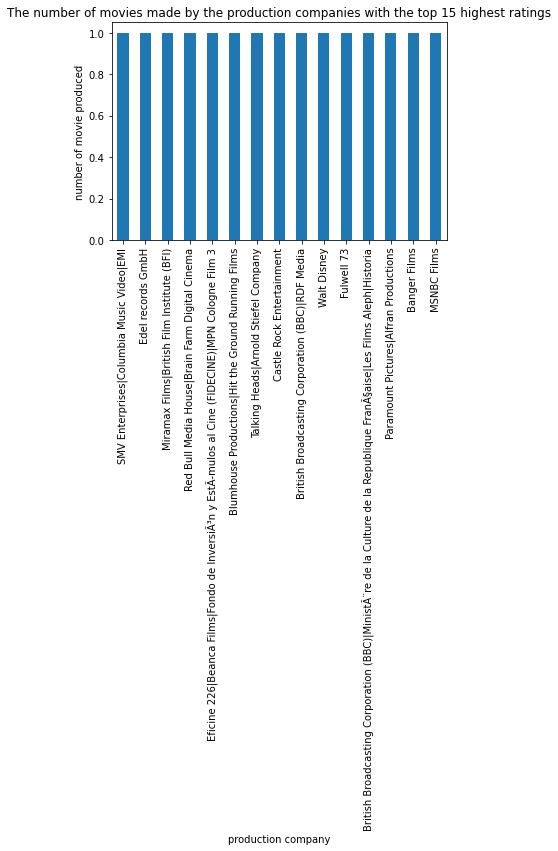

In [48]:
#plotting a bar chart to show the number of movies made by a production company that produced high ratings
df5['production_companies'].value_counts().plot(kind = 'bar')
plt.xlabel('production company')
plt.ylabel('number of movie produced')
plt.title('The number of movies made by the production companies with the top 15 highest ratings')
plt.show()

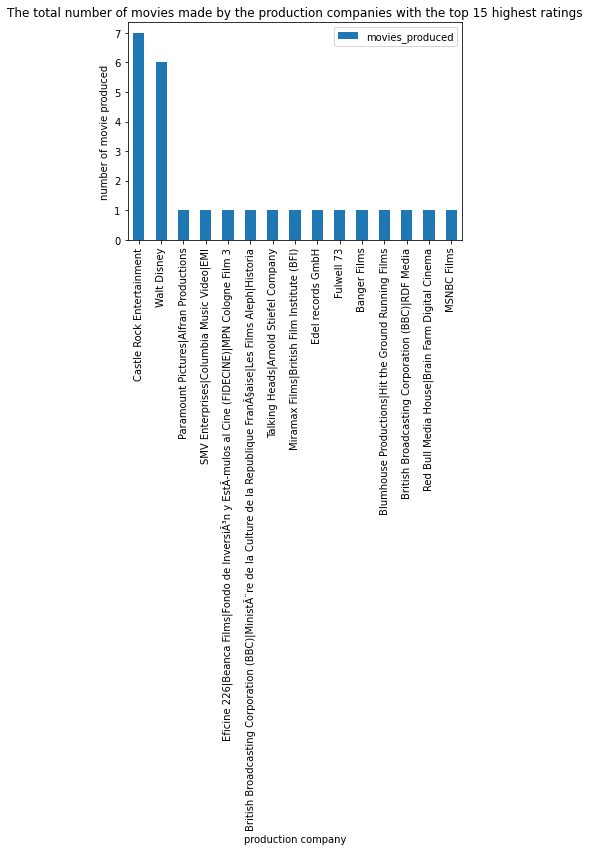

In [49]:
#plotting a bar chart to show the total number of movies made by a production company that produced high ratings
df6.plot.bar(x = 'production_company', y = 'movies_produced')
plt.xlabel('production company')
plt.ylabel('number of movie produced')
plt.title('The total number of movies made by the production companies with the top 15 highest ratings')
plt.show()

From the analysis above it can be seen that Castle Rock Entertainment produced the most movies anmongs the companies with the top 15 highest ratings. 

## Question 5: Companies that produced movies with active viewers?

In [50]:
#arranging the dataframe by vote count in a descending order to get the top 15 movies with active viewers
df7 = df.sort_values(by=['vote_count'], ascending = False).head(15)
df7

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
original_title,,,,,,,,,,,,
Inception,9.363643,160000000.0,8.255000e+08,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148.0,"Action, Thriller, Science Fiction, Mystery, Ad...",Legendary Pictures|Warner Bros.|Syncopy,9767,7.9,2010,6.655000e+08
The Avengers,7.637767,220000000.0,1.519558e+09,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,"Science Fiction, Action, Adventure",Marvel Studios,8903,7.3,2012,1.299558e+09
Avatar,9.432768,237000000.0,2.781506e+09,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,"Action, Adventure, Fantasy, Science Fiction",Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.544506e+09
The Dark Knight,8.466668,185000000.0,1.001922e+09,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152.0,"Drama, Action, Crime, Thriller",DC Comics|Legendary Pictures|Warner Bros.|Syncopy,8432,8.1,2008,8.169218e+08
Django Unchained,5.944518,100000000.0,4.253682e+08,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,165.0,"Drama, Western",Columbia Pictures|The Weinstein Company,7375,7.7,2012,3.253682e+08
The Hunger Games,2.571099,75000000.0,6.912107e+08,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Gary Ross,142.0,"Science Fiction, Adventure, Fantasy",Lionsgate|Color Force,7080,6.7,2012,6.162107e+08
Iron Man 3,4.946136,200000000.0,1.215440e+09,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130.0,"Action, Adventure, Science Fiction",Marvel Studios,6882,6.9,2013,1.015440e+09
The Dark Knight Rises,6.591277,250000000.0,1.081041e+09,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,165.0,"Action, Crime, Drama, Thriller",Legendary Pictures|Warner Bros.|DC Entertainme...,6723,7.5,2012,8.310413e+08
Interstellar,24.949134,165000000.0,6.217525e+08,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169.0,"Adventure, Drama, Science Fiction",Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014,4.567525e+08


In [51]:
#getting the names of the the companies with the top 15 active viewers
active_viewers = df7['production_companies'].unique()
active_viewers

array(['Legendary Pictures|Warner Bros.|Syncopy', 'Marvel Studios',
       'Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment',
       'DC Comics|Legendary Pictures|Warner Bros.|Syncopy',
       'Columbia Pictures|The Weinstein Company', 'Lionsgate|Color Force',
       'Legendary Pictures|Warner Bros.|DC Entertainment|Syncopy',
       'Paramount Pictures|Legendary Pictures|Warner Bros.|Syncopy|Lynda Obst Productions',
       'WingNut Films|New Line Cinema|Metro-Goldwyn-Mayer (MGM)',
       'Village Roadshow Pictures|Groucho II Film Partnership|Silver Pictures|Warner Bros.',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Columbia Pictures',
       'WingNut Films|New Line Cinema|The Saul Zaentz Company'],
      dtype=object)

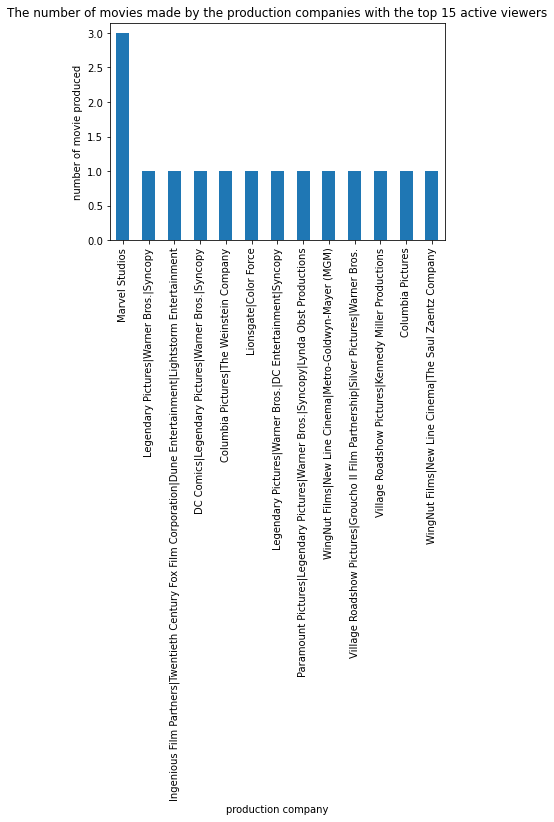

In [52]:
#plotting a bar chart to show the number of movies made by the production companies that had the top 15 highest active viewers
df7['production_companies'].value_counts().plot(kind = 'bar')
plt.xlabel('production company')
plt.ylabel('number of movie produced')
plt.title('The number of movies made by the production companies with the top 15 active viewers')
plt.show()

In [53]:
#converting the names of the the companies with the top 15 active viewers to a list
active_viewers_list = active_viewers.tolist()
active_viewers_list

['Legendary Pictures|Warner Bros.|Syncopy',
 'Marvel Studios',
 'Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment',
 'DC Comics|Legendary Pictures|Warner Bros.|Syncopy',
 'Columbia Pictures|The Weinstein Company',
 'Lionsgate|Color Force',
 'Legendary Pictures|Warner Bros.|DC Entertainment|Syncopy',
 'Paramount Pictures|Legendary Pictures|Warner Bros.|Syncopy|Lynda Obst Productions',
 'WingNut Films|New Line Cinema|Metro-Goldwyn-Mayer (MGM)',
 'Village Roadshow Pictures|Groucho II Film Partnership|Silver Pictures|Warner Bros.',
 'Village Roadshow Pictures|Kennedy Miller Productions',
 'Columbia Pictures',
 'WingNut Films|New Line Cinema|The Saul Zaentz Company']

In [54]:
#converting the list of the the companies with the top 15 active viewers to a dataframe
df8 = df1.loc[df1['production_company'].isin(active_viewers_list)]
df8

,production_company,movies_produced
4,Columbia Pictures,72
19,Marvel Studios,22
187,Lionsgate|Color Force,3
420,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,2
568,WingNut Films|New Line Cinema|The Saul Zaentz ...,2
4332,Ingenious Film Partners|Twentieth Century Fox ...,1
4471,Village Roadshow Pictures|Groucho II Film Part...,1
4572,Legendary Pictures|Warner Bros.|Syncopy,1
5496,Paramount Pictures|Legendary Pictures|Warner B...,1
5699,Columbia Pictures|The Weinstein Company,1


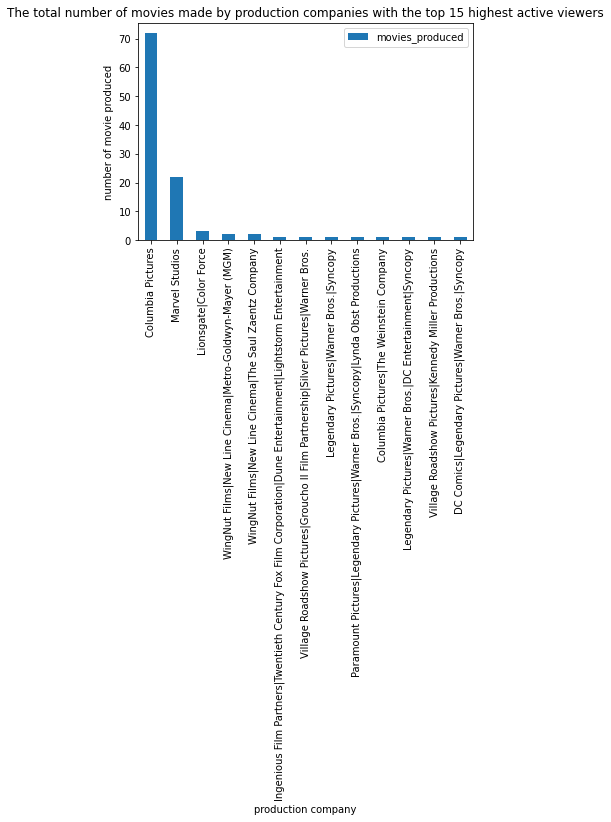

In [55]:
#plotting a bar chart to show the total number of movies made by the production companies with the highest active viewers
df8.plot.bar( x = 'production_company', y = 'movies_produced');
plt.xlabel('production company')
plt.ylabel('number of movie produced')
plt.title('The total number of movies made by production companies with the top 15 highest active viewers')
plt.show()

From the analysis above it can be seen that Columbia Picture produced the most movies amongst other production companies with the highest active viewers, while Marvel Studios produced the most movies with active viewers.

<a id='conclusions'></a>
## Conclusion

From all the analysis done it can be seen that;
1. Avatar is a movie that produced the highest profit, which was produced by Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment.
2. Both Columbia Pictures and Marvel Studios has produced movies with the highest active viewers and highest profit, so we can say high vote count is postively related to high profit.
3. The number of movies produced increased over time.
4. There are many missing values in the dataset, making me to drop their rows
5. There are many rows filled with zeros, making me to fill the rows with the means of their columns.